El algoritmo DBSCAN se basa en esta noción intuitiva de "clústeres" y "ruido". La idea clave es que para cada punto de un grupo, la vecindad de un radio determinado debe contener al menos un número mínimo de puntos.

Los métodos de particionamiento como kmeans son adecuados solo para grupos compactos y bien separados. Y se ven gravemente afectados por la presencia de ruido y valores atípicos en los datos.

El algoritmo DBSCAN requiere dos parámetros:

$\textbf{eps}$: define la vecindad alrededor de un punto de datos, es decir, si la distancia entre dos puntos es menor o igual a "eps", entonces se consideran vecinos. Si el valor de eps se elige demasiado pequeño, gran parte de los datos se considerarán valores atípicos. Si se elige muy grande, los grupos se fusionarán y la mayoría de los puntos de datos estarán en los mismos grupos. Una forma de encontrar el valor de eps se basa en el gráfico de distancia k.

$\textbf{MinPts}$: número mínimo de vecinos (puntos de datos) dentro del radio eps. Cuanto mayor sea el conjunto de datos, se debe elegir el valor mayor de MinPts. Como regla general, los MinPts mínimos se pueden derivar del número de dimensiones D en el conjunto de datos como MinPts> = D + 1. El valor mínimo de MinPts debe elegirse al menos 3.

En este algoritmo, tenemos 3 tipos de puntos de datos.

* Punto central (core point): un punto es un punto central si tiene más de MinPts puntos  dentro de eps.

* Punto frontera (Border Point): un punto que tiene menos de MinPts dentro de eps, pero se encuentra en la vecindad de un punto central.

* Ruido o valor atípico: un punto que no es un punto central o un punto fronterizo

<img src="dbscan.png">

### Algoritmo 

1. Encuentramos todos los puntos vecinos dentro de eps e identificamos los puntos centrales o visitados con más vecinos que MinPts.
2. Para cada punto central, si aún no está asignado a un clúster, creamos un nuevo clúster.
3. Encuentramos de forma recursiva todos sus puntos conectados por densidad y los asignamos a el mismo grupo que el punto central. Se dice que un punto a y b está conectado por densidad si existe un punto c que tiene un número suficiente de puntos en sus vecinos y ambos puntos a y b están dentro de la distancia eps. Este es un proceso de encadenamiento. Entonces, si b es vecino de c, c es vsu vez es vecino de a implica que b es vecino de a.

In [17]:
from   sklearn.cluster         import DBSCAN 
from   sklearn                 import metrics 
from   sklearn.preprocessing   import StandardScaler 
import numpy                   as     np 
from   sklearn.decomposition   import PCA
import matplotlib.pylab        as     plt
from   sklearn.metrics       import silhouette_score,calinski_harabaz_score

In [7]:
#cargamos los datos de iris
iris=datasets.load_iris()
X=iris.data

In [12]:
#obtenemos los dos componentes principales de iris mediante PCA
pca=PCA(n_components=2).fit(X)
pca_2d=pca.transform(X)

In [13]:
#ajustamos el dbscan
dbscan=DBSCAN(eps=0.5, metric='euclidean', min_samples=5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [18]:
silhouette_score(X,dbscan.labels_)

0.48603419703456835

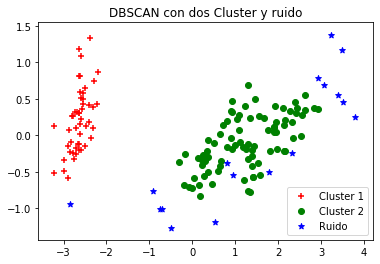

In [14]:
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Ruido'])
plt.title('DBSCAN con dos Cluster y ruido')
plt.show()